In [385]:
"""
 * Generate a grayscale histogram for an image.
 *
 * Usage: python GrayscaleHistogram.py <fiilename>
"""
import sys
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
import cv2

from skimage.io import imread_collection, imshow
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import glob
from skimage import color
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from matplotlib import cm
import matplotlib as mpl
from PIL import Image
import requests
sns.set()
plt.rcParams["axes.grid"] = False

In [3]:
paintings = imread_collection('/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg')

In [4]:
len(paintings)

122

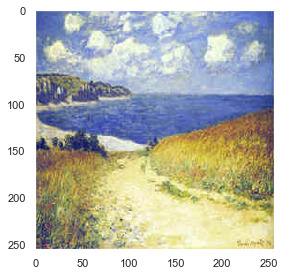

In [5]:
imshow(paintings[0])

In [7]:
generated = imread_collection('/Users/arpit/Desktop/GAN/Dataset/Paint_Fake_Test/*.png')

In [9]:
len(generated)

751

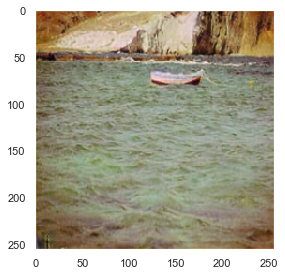

In [10]:
imshow(generated[0])

In [114]:
paint = paintings[0:100]
gen = generated[0:100]

In [154]:
#change this
def color_quantization(original, n_colors=256):
    arr = original.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(original.shape).astype('uint8')
    return less_colors, centers, labels, kmeans.predict(arr), kmeans, arr

temp = paint[0]

temp.reshape((-1, 3)).shape

_,cen,lab,kmeans_temp, kmeans, arr = color_quantization(temp)

lab

kmeans_temp

arr.shape

# Loss using Kmeans and KNN classifier

In [166]:
## axis should be 0 not -1 and fir at the end then predict 
mp_pallete = []
cluster_pred = []
cen = []
mp = []
cl = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans, arr = color_quantization(i, 256)
    mp.extend(arr.astype(np.int))
    cl.extend(clusters.astype(np.int))
    cen.extend(centers.astype(np.int))

100%|██████████| 100/100 [42:58<00:00, 25.78s/it]


In [167]:
len(mp)

6553600

In [168]:
type(cen)

list

In [169]:
len(cen)

25600

In [170]:
len(np.unique(cen, axis=0))

25403

In [171]:
cen = [tuple(i) for i in cen]

In [214]:
random = range(0,len(np.unique(cen, axis=0)))

In [215]:
random

range(0, 25403)

In [263]:
my_dict = {k: v for k, v in zip(cen, random)}

In [264]:
len(my_dict)

25211

In [265]:
my_dict

{(137, 156, 199): 0,
 (138, 145, 99): 1,
 (245, 241, 196): 2,
 (76, 95, 168): 3,
 (218, 209, 134): 4,
 (197, 209, 197): 20941,
 (108, 83, 68): 6,
 (184, 175, 87): 7,
 (99, 121, 180): 8,
 (160, 152, 65): 9,
 (80, 85, 116): 10,
 (181, 195, 220): 11,
 (164, 179, 200): 12,
 (226, 237, 229): 13,
 (125, 133, 147): 14,
 (244, 233, 161): 15,
 (146, 131, 72): 16,
 (208, 202, 84): 17,
 (158, 159, 150): 18,
 (182, 183, 105): 19,
 (119, 141, 196): 20,
 (35, 39, 83): 21,
 (81, 99, 143): 22,
 (127, 97, 92): 23,
 (192, 185, 153): 24,
 (201, 175, 66): 25,
 (233, 220, 149): 26,
 (104, 100, 97): 27,
 (107, 110, 127): 28,
 (202, 214, 211): 29,
 (160, 177, 224): 30,
 (90, 112, 168): 31,
 (50, 67, 139): 32,
 (235, 229, 180): 33,
 (88, 65, 86): 34,
 (143, 156, 166): 35,
 (140, 109, 75): 36,
 (115, 137, 174): 37,
 (149, 163, 192): 38,
 (218, 230, 237): 39,
 (153, 161, 94): 40,
 (173, 162, 90): 41,
 (239, 248, 218): 42,
 (174, 188, 216): 43,
 (180, 190, 182): 44,
 (119, 112, 96): 13837,
 (160, 132, 64): 46,
 

In [266]:
len(my_dict)

25211

In [267]:
X = pd.DataFrame(my_dict.keys(), columns=list('RGB'))
Y = pd.DataFrame(my_dict.values(), columns=["Labels"])

In [268]:
X.shape

(25211, 3)

In [269]:
len(Y.values.ravel())

25211

In [270]:
knn = KNeighborsClassifier(n_neighbors=1) 

In [271]:
knn.fit(X,Y.values.ravel())

KNeighborsClassifier(n_neighbors=1)

In [272]:
original_paint = []
for i in paint:
    original_paint.extend(i.reshape((-1, 3)))

In [273]:
len(original_paint)

6553600

In [284]:
original_paint = [tuple(i) for i in original_paint]
len(original_paint)

6553600

In [285]:
painting_pallete = knn.predict(original_paint)

In [275]:
pal = []
for i in gen:
    pal.extend(i.reshape((-1, 3)))

In [276]:
pal = [tuple(i) for i in pal]
len(pal)

6553600

In [277]:
generated_pallete = knn.predict(pal)

In [278]:
len(generated_pallete)

6553600

<ipython-input-286-7e86e18b21bd>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


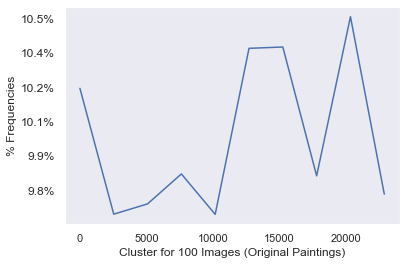

In [286]:
quantized_imX, binEdges_1 = np.histogram(painting_pallete)
#original paintings
fig, ax = plt.subplots()
total = sum(quantizedImX)
ax.plot(binEdges_1[:-1], quantized_imX)
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Original Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<ipython-input-287-7e57e7616eee>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


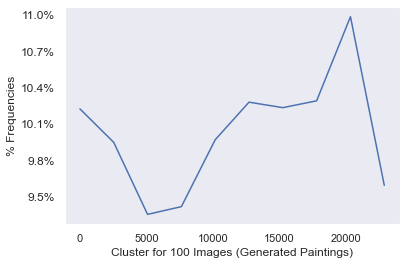

In [287]:
quantized_imY, binEdges_2 = np.histogram(generated_pallete)
#original paintings
fig, ax = plt.subplots()
ax.plot(binEdges_2[:-1], quantized_imY)
yvals = ax.get_yticks()
total = sum(quantizedImY)
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.xlabel('Cluster for 100 Images (Generated Paintings)')
plt.ylabel('% Frequencies')
plt.draw()

<Figure size 1440x1440 with 0 Axes>

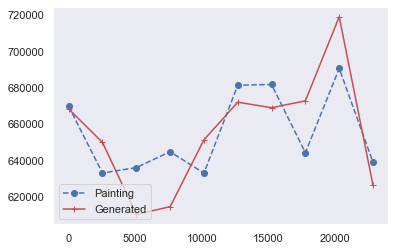

In [288]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot(binEdges_1[:-1], quantized_imX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges_2[:-1], quantized_imY, c='r',marker="+", ls='-', label='Generated')
plt.legend(loc=3)
plt.draw()

<ipython-input-289-0f5d1a1d29bd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)


<Figure size 1440x1440 with 0 Axes>

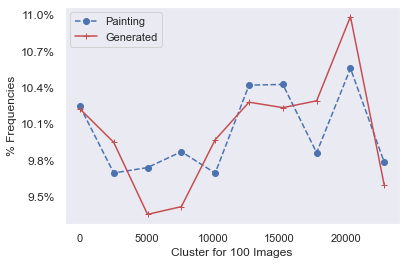

In [289]:
from matplotlib.ticker import FuncFormatter
quantizedImX, binEdges1 = np.histogram(painting_pallete)
quantizedImY, binEdges2 = np.histogram(generated_pallete)
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
total = sum(quantizedImY)
ax.plot(binEdges1[:-1], quantizedImX, c='b',marker="o", ls='--', label='Painting')
ax.plot(binEdges2[:-1], quantizedImY, c='r',marker="+", ls='-', label='Generated')
yvals = ax.get_yticks()
ax.set_yticklabels(["{:,.1%}".format(y/total) for y in yvals], fontsize=12)
plt.legend(loc=2)
plt.xlabel('Cluster for 100 Images')
plt.ylabel('% Frequencies')
plt.draw()

In [ ]:
#https://www.researchgate.net/post/Does_anyone_know_any_clustering_algorithm_that_use_predefined_centroids
#K = 1 Comment 2

# Final Pallete 

In [293]:
#Final Pallete
X.shape

(25211, 3)

In [298]:
len(original_paint)

6553600

In [299]:
X

,R,G,B
0,137,156,199
1,138,145,99
2,245,241,196
3,76,95,168
4,218,209,134
...,...,...,...
25206,148,147,119
25207,144,111,89
25208,145,115,14
25209,157,143,132


# Reduce the Palette

In [301]:
## https://blogs.lt.vt.edu/summeraugust/sample-page/claude-monet-color-techniques-and-influences/
## Used 9 colors 
mp_pallete = []
cluster_pred = []
cen = []
mp = []
cl = []
for i in tqdm(paint):
    less_colors, centers, labels, clusters, kmeans, arr = color_quantization(i, 9)
    mp.extend(arr.astype(np.int))
    cl.extend(clusters.astype(np.int))
    cen.extend(centers.astype(np.int))

100%|██████████| 100/100 [01:56<00:00,  1.16s/it]


In [302]:
len(cen)

900

In [310]:
len(np.unique(cen, axis =-1))

900

In [324]:
import operator
list1 = sorted(cen, key=operator.itemgetter(0,1,2))

In [327]:
list1

[array([ 7, 24, 55]),
 array([ 8, 39, 20]),
 array([13, 18, 14]),
 array([14, 16,  4]),
 array([14, 38, 51]),
 array([17, 33, 39]),
 array([18, 38, 39]),
 array([ 18,  78, 110]),
 array([19, 17, 53]),
 array([19, 20, 23]),
 array([19, 27, 44]),
 array([19, 30, 42]),
 array([20,  7,  5]),
 array([20, 30, 34]),
 array([21, 35, 70]),
 array([21, 37, 49]),
 array([22, 13, 17]),
 array([23, 20, 30]),
 array([23, 23, 19]),
 array([23, 23, 33]),
 array([25, 12, 19]),
 array([25, 43, 20]),
 array([26, 23, 25]),
 array([26, 34, 49]),
 array([27, 20, 13]),
 array([27, 36, 29]),
 array([28, 23, 18]),
 array([28, 42, 41]),
 array([28, 51, 46]),
 array([29, 23, 19]),
 array([29, 31, 19]),
 array([29, 51, 56]),
 array([30, 21, 11]),
 array([30, 23, 25]),
 array([30, 23, 31]),
 array([30, 25, 26]),
 array([30, 44, 58]),
 array([32, 18, 16]),
 array([32, 40, 48]),
 array([33, 42, 73]),
 array([33, 55, 75]),
 array([35, 36, 18]),
 array([35, 79, 63]),
 array([35, 83, 85]),
 array([36, 24, 12]),
 array(

In [339]:
path = '/Users/arpit/Desktop/GAN/monet2photo/testA/*.jpg'
filenames = [img for img in glob.glob(path)]
filenames.sort()

In [346]:
mp_palette = []
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_UNCHANGED)
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

    print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))
    mp_palette.append(centers[0].astype(np.int32))

Dominant color is: bgr([154 165 163])
Dominant color is: bgr([172 158 119])
Dominant color is: bgr([155 157 156])
Dominant color is: bgr([142 141 130])
Dominant color is: bgr([118 118 119])
Dominant color is: bgr([116 111 121])
Dominant color is: bgr([169 168 185])
Dominant color is: bgr([106 119 111])
Dominant color is: bgr([157 162 160])
Dominant color is: bgr([102 126 120])
Dominant color is: bgr([113 122 132])
Dominant color is: bgr([117 126 135])
Dominant color is: bgr([147 115 127])
Dominant color is: bgr([158 160 141])
Dominant color is: bgr([131 101 100])
Dominant color is: bgr([144 179 157])
Dominant color is: bgr([131 154 139])
Dominant color is: bgr([109 125 157])
Dominant color is: bgr([152 163 175])
Dominant color is: bgr([130 163 175])
Dominant color is: bgr([120 117 134])
Dominant color is: bgr([168 164 160])
Dominant color is: bgr([64 91 97])
Dominant color is: bgr([ 90 104 114])
Dominant color is: bgr([176 160 168])
Dominant color is: bgr([138 152 171])
Dominant color 

In [348]:
len(mp_palette)

122

In [351]:
len(np.unique(mp_palette, axis =0))

122

In [354]:
mp_palette = [tuple(i) for i in mp_palette]

In [358]:
mp_palette

[(154, 165, 163),
 (172, 158, 119),
 (155, 157, 156),
 (142, 141, 130),
 (118, 118, 119),
 (116, 111, 121),
 (169, 168, 185),
 (106, 119, 111),
 (157, 162, 160),
 (102, 126, 120),
 (113, 122, 132),
 (117, 126, 135),
 (147, 115, 127),
 (158, 160, 141),
 (131, 101, 100),
 (144, 179, 157),
 (131, 154, 139),
 (109, 125, 157),
 (152, 163, 175),
 (130, 163, 175),
 (120, 117, 134),
 (168, 164, 160),
 (64, 91, 97),
 (90, 104, 114),
 (176, 160, 168),
 (138, 152, 171),
 (86, 104, 121),
 (127, 134, 174),
 (91, 145, 147),
 (143, 130, 91),
 (83, 105, 100),
 (96, 71, 62),
 (150, 173, 171),
 (107, 132, 160),
 (113, 131, 129),
 (129, 158, 157),
 (173, 148, 127),
 (139, 135, 142),
 (61, 108, 140),
 (124, 119, 103),
 (125, 84, 85),
 (125, 141, 111),
 (113, 130, 127),
 (84, 90, 89),
 (132, 128, 124),
 (144, 152, 147),
 (133, 150, 158),
 (126, 151, 156),
 (98, 100, 104),
 (138, 122, 107),
 (97, 117, 130),
 (71, 91, 86),
 (142, 132, 125),
 (181, 182, 189),
 (100, 118, 127),
 (144, 154, 142),
 (140, 164, 16

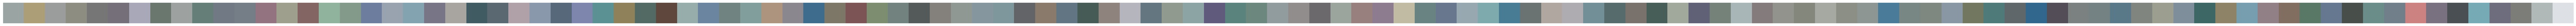

In [408]:
scaled_colours = [[color / 255 for color in row] for row in mp_palette]
sns.palplot(scaled_colours)

In [399]:
len(scaled_colours)

1072

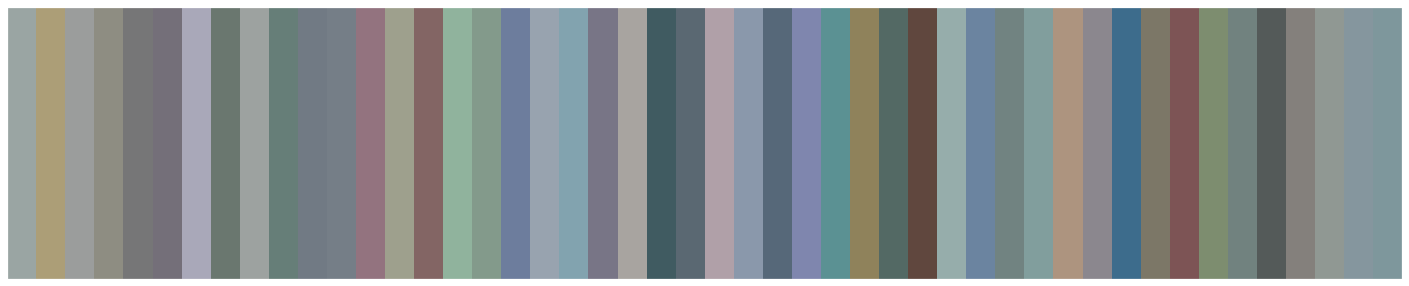

In [415]:
barColors = (np.array(mp_palette)).astype(np.uint8)

title = "p"
#creating bar image
cols = len(barColors)
rows = max([1,int(cols/2.5)])

# Create color Array
barFullData = np.tile(barColors, (rows,1)).reshape(rows, cols, 3)
# Create Image from Array
barImg = Image.fromarray(barFullData, 'RGB')
#saving image
barImg.save("{}_{}.png".format(title,"method"))
fig, ax = plt.subplots(figsize=(25, 5))
ax.axis(xmin=0, xmax=len(barFullData))
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for index, colour in enumerate(scaled_colours):
    ax.axvspan(index, index + 1, color=colour)
    ax.patch.set_visible(False)

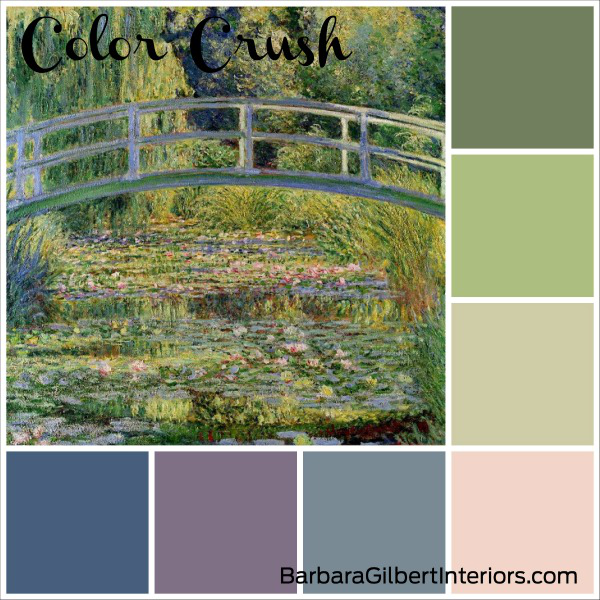

In [393]:
url = 'https://www.interiordesigndallas.com/wp-content/uploads/2018/06/Color-Crush-Water-Lilies-3.jpg'
Image.open(requests.get(url, stream=True).raw)

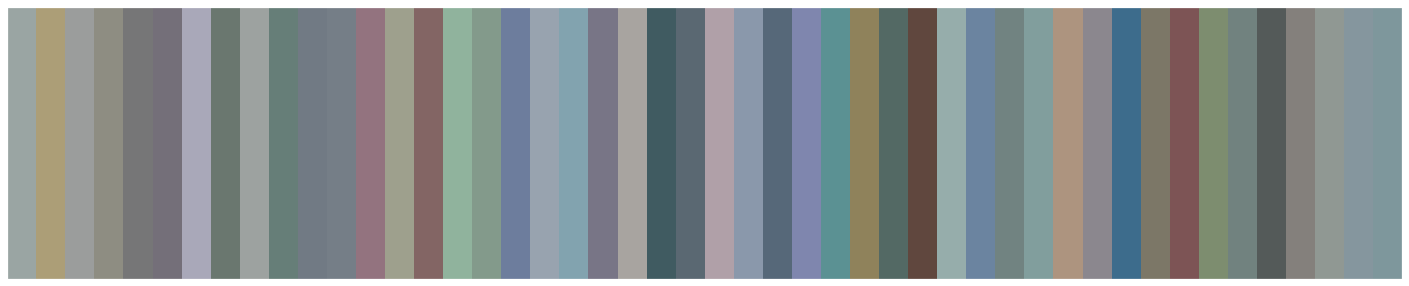

# Another Palette

In [359]:
path_1 = '/Users/arpit/Desktop/GAN/monet2photo/trainA/*.jpg'
filenames = [img for img in glob.glob(path_1)]
filenames.sort()

In [372]:
mp_palette1 = []
lab = []
for name in filenames:
    img = cv2.imread(name,cv2.IMREAD_UNCHANGED)
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(data,1,None,criteria,10,flags)

    #print('Dominant color is: bgr({})'.format(centers[0].astype(np.int32)))
    mp_palette1.append(centers[0].astype(np.int32))
    lab.append(labels)

In [369]:
mp_palette1.extend(mp_palette)

In [370]:
len(mp_palette1)

1194

In [371]:
len(np.unique(mp_palette1, axis = 0))

1193

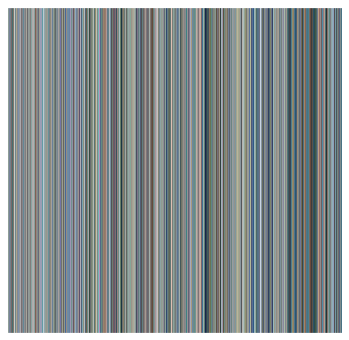

In [380]:
scaled_colours = [[color / 255 for color in row] for row in mp_palette1]
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis(xmin=0, xmax=len(scaled_colours))
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
for index, colour in enumerate(scaled_colours):
    ax.axvspan(index, index + 1, color=colour)